<a href="https://colab.research.google.com/github/julianorinaldi/CAIA003-DAT003-DataMining/blob/main/Atividade4/Exercicio2/Atividade4_B_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

#dataset=pd.read_csv('https://drive.google.com/uc?id=1-1mDiA6uzvvfVfFH47jgJgfm6fC0g0Hb&export=download')
dataset=pd.read_csv('https://raw.githubusercontent.com/julianorinaldi/CAIA003-DAT003-DataMining/main/Atividade4/Exercicio2/Dataset/datasetCarros%5Boriginal%5D.csv')
dataset.head()

,Nome,Ano,PrecoVenda,PrecoAtual,KmRodado,TipoCombustivel,Trasmissao,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Manual,0


In [44]:
dataset.dtypes

Nome                object
Ano                  int64
PrecoVenda         float64
PrecoAtual         float64
KmRodado             int64
TipoCombustivel     object
Trasmissao          object
Owner                int64
dtype: object

In [45]:
X=dataset[['Nome', 'Ano', 'PrecoAtual',	'KmRodado', 'TipoCombustivel', 'Trasmissao', 'Owner']]
y=dataset['PrecoVenda']

# Regressão Linear - Modelo statsmodels


## a. Faça um modelo de regressão linear simples utilizando a variável 'KmRodado' para prever a 'PrecoVenda'.

In [46]:
#Usando o statsmodels
import statsmodels.api as sm

kmRodado = sm.add_constant(X['KmRodado']) 

model_kmRodado = sm.OLS(y, kmRodado).fit()

model_kmRodado.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PrecoVenda   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2549
Date:                Sat, 02 Jul 2022   Prob (F-statistic):              0.614
Time:                        01:29:37   Log-Likelihood:                -915.86
No. Observations:                 301   AIC:                             1836.
Df Residuals:                     299   BIC:                             1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5203      0.405     11.163      0.000       3.723       5.317
KmRodado    3.815e-06   7.56e-06      0.505      0.614   -1.11e-05    1.87e-05
==============================================================================
Omnibus:                      181.357   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1261.766
Skew:                           2.478   Prob(JB):                    1.03e-274
Kurtosis:                      11.720   Cond. No.                     7.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regressão Linear - Modelo sklearn

## b. Calcule o R2 para o modelo criado.

R2: 0.0008518862620293666

In [47]:
from sklearn import linear_model

regr_KmRodado = linear_model.LinearRegression()
X_KmRodado = np.array(X['KmRodado']).reshape((-1, 1))
regr_KmRodado.fit(X_KmRodado, y)
r_sq = regr_KmRodado.score(X_KmRodado, y)
print('R2:', r_sq)
print('Intercept:', regr_KmRodado.intercept_)
print('Slope:', regr_KmRodado.coef_) 

R2: 0.0008518862620293666
Intercept: 4.520343021594408
Slope: [3.81497479e-06]


## c. Separe o dataset em teste (5%) e treino (95%). Use o método 'train_test_split' do sklearn; configure o parâmetro random_state=10.

Coeficiente: [2.69091958e-06]
Mean squared error: 23.18
R2 (ou coeficiente de determinação): 0.00


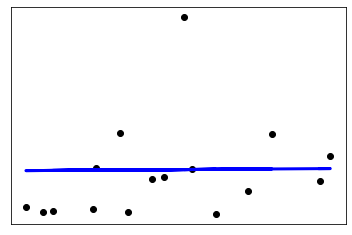

In [48]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Setando apenas o KmRodado
X=dataset[['KmRodado']]

# Separa dados de treino em 5%, e 95% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=10)

# Cria um objeto de regressão linear 
regr_KmRodado = linear_model.LinearRegression()

# Treina o modelo usando o conjunto de treino
regr_KmRodado.fit(X_train, y_train)

# Faz predições usando o conjunto de teste 
y_pred = regr_KmRodado.predict(X_test)

# Coeficientes
print("Coeficiente:", regr_KmRodado.coef_)

# Mean squared error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# O coeficiente de determinação (ou R2)
print("R2 (ou coeficiente de determinação): %.2f" % r2_score(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
    

## d. Treine um modelo de regressão linear múltipla no dataset de treino utilizando todas as variáveis (exceto 'Nome') para prever a 'PrecoVenda' e exiba os coeficientes do modelo.

In [49]:
from sklearn.model_selection import train_test_split

X=dataset[['Ano', 'PrecoAtual',	'KmRodado', 'Owner']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X, y)

print(lm.intercept_, lm.coef_)

-1184.1607433764077 [ 5.89917156e-01 -8.73098775e-04  2.73365136e-05 -9.50400115e-01]


In [51]:
#Usando o statsmodels
import statsmodels.api as sm

X_intercept = sm.add_constant(X) 

model = sm.OLS(y, X_intercept).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PrecoVenda   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     7.356
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.17e-05
Time:                        01:29:37   Log-Likelihood:                -901.72
No. Observations:                 301   AIC:                             1813.
Df Residuals:                     296   BIC:                             1832.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1184.1607    235.258     -5.033      0.000   -1647.150    -721.171
Ano            0.5899      0.117      5.053      0.000       0.360       0.820
PrecoAtual    -0.0009      0.003     -0.342      0.732      -0.006       0.004
KmRodado    2.734e-05   8.53e-06      3.205      0.001    1.06e-05    4.41e-05
Owner         -0.9504      1.157     -0.821      0.412      -3.227       1.326
==============================================================================
Omnibus:                      185.623   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1634.581
Skew:                           2.441   Prob(JB):                         0.00
Kurtosis:                      13.320   Cond. No.                     4.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X.corr()

,Ano,PrecoAtual,KmRodado,Owner
Ano,1.000000,-0.092304,-0.524342,-0.182104
PrecoAtual,-0.092304,1.000000,-0.007744,-0.024398
KmRodado,-0.524342,-0.007744,1.000000,0.089216
Owner,-0.182104,-0.024398,0.089216,1.000000


## e. Avalie o modelo encontrado utilizando o dataset de teste. Calcule o R2 e MSE.

In [53]:
 Ano=2014
 PrecoAtual=5.5
 KmRodado=3000
 Owner=0
 print(lm.predict([[Ano, PrecoAtual, KmRodado, Owner]]))

[4.00961628]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
# Todas features que são numéricas
X=dataset[['Ano', 'PrecoAtual',	'KmRodado', 'Owner']]

# Separa dados de treino em 5%, e 95% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

# Cria um objeto de regressão linear 
regr = linear_model.LinearRegression()

# Treina o modelo usando o conjunto de treino
regr.fit(X_train, y_train)

# Faz predições usando o conjunto de teste 
y_pred = regr.predict(X_test)

# Coeficientes
print("Coeficiente:", regr.coef_)

# Mean squared error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# O coeficiente de determinação (ou R2)
print("R2 (ou coeficiente de determinação): %.4f" % r2_score(y_test, y_pred))

scoresTreeReg = cross_val_score(regr, X, y, cv=5, scoring='r2')
print("Validação cruzada %.4f" % scoresTreeReg.mean())

    

Coeficiente: [ 8.40174424e-01 -7.57888404e-04  6.57984636e-05 -7.15540633e-01]
Mean squared error: 29.83
R2 (ou coeficiente de determinação): -0.1014
Validação cruzada -267.7867
